<a href="https://colab.research.google.com/github/avtar123/Employe-Burn-Rate-predection./blob/main/EmployeBurnRate_predection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
import seaborn as sns

In [ ]:
train=pd.read_csv("/content/drive/MyDrive/Eployee_burn_rate/dataset/train.csv")
test=pd.read_csv("/content/drive/MyDrive/Eployee_burn_rate/dataset/test.csv")

In [ ]:
print("Train data shape:", train.shape)
print("Test data shape:", test.shape)

Train data shape: (22750, 9)
Test data shape: (12250, 8)


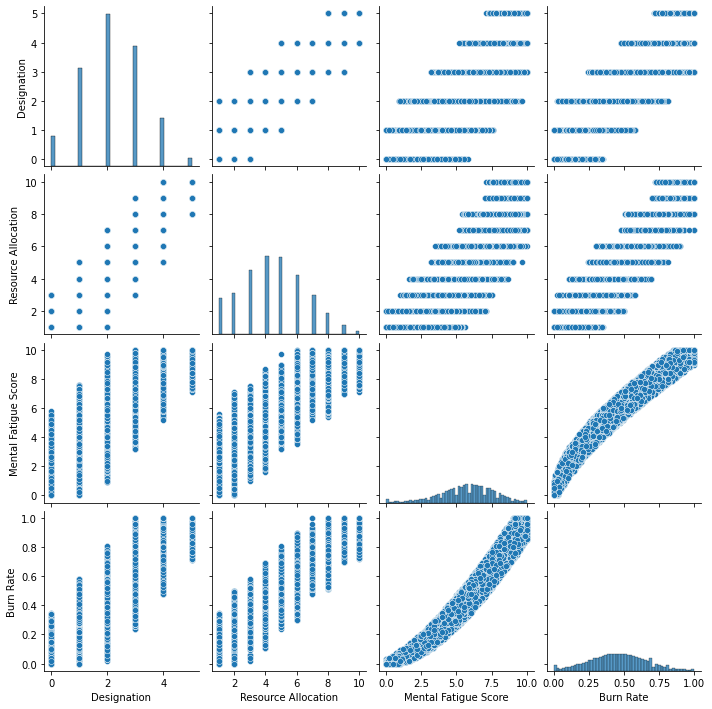

In [ ]:
sns.pairplot(train)

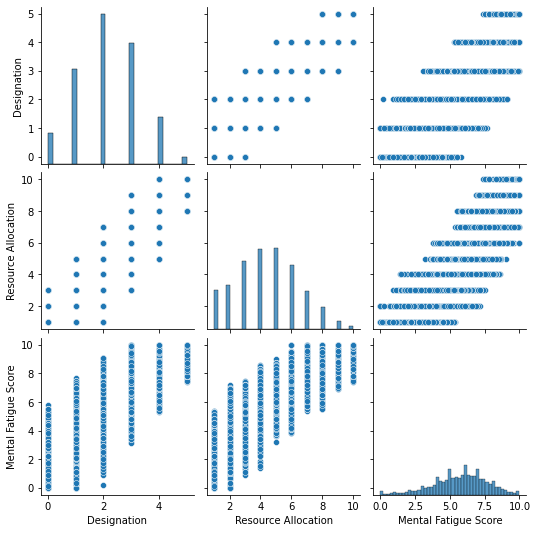

In [ ]:
sns.pairplot(test)

In [ ]:
train['data']='train'
test['data']='test'
data = pd.concat([train,test],axis=0, sort=True)
data.shape

(35000, 10)

In [ ]:
data.head()

,Burn Rate,Company Type,Date of Joining,Designation,Employee ID,Gender,Mental Fatigue Score,Resource Allocation,WFH Setup Available,data
0,0.16,Service,2008-09-30,2.0,fffe32003000360033003200,Female,3.8,3.0,No,train
1,0.36,Service,2008-11-30,1.0,fffe3700360033003500,Male,5.0,2.0,Yes,train
2,0.49,Product,2008-03-10,2.0,fffe31003300320037003900,Female,5.8,NaN,Yes,train
3,0.20,Service,2008-11-03,1.0,fffe32003400380032003900,Male,2.6,1.0,Yes,train
4,0.52,Service,2008-07-24,3.0,fffe31003900340031003600,Female,6.9,7.0,No,train


In [ ]:
data.tail()

,Burn Rate,Company Type,Date of Joining,Designation,Employee ID,Gender,Mental Fatigue Score,Resource Allocation,WFH Setup Available,data
12245,NaN,Service,2008-10-02,1.0,fffe3900310034003700,Female,6.1,2.0,Yes,test
12246,NaN,Product,2008-03-31,2.0,fffe32003600330034003000,Female,5.9,4.0,Yes,test
12247,NaN,Service,2008-02-12,4.0,fffe31003800340039003000,Male,9.6,7.0,No,test
12248,NaN,Service,2008-02-06,3.0,fffe32003600380031003800,Male,6.7,6.0,No,test
12249,NaN,Product,2008-08-05,2.0,fffe32003100390037003800,Female,2.0,2.0,No,test


In [ ]:
train.describe()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750.000000,21369.000000,20633.000000,21626.000000
mean,2.178725,4.481398,5.728188,0.452005
std,1.135145,2.047211,1.920839,0.198226
min,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.000000,4.600000,0.310000
50%,2.000000,4.000000,5.900000,0.450000
75%,3.000000,6.000000,7.100000,0.590000
max,5.000000,10.000000,10.000000,1.000000


In [ ]:
def frequency_table(data, column):
    return pd.crosstab(index=data[column],
                           columns="count").sort_values(by = "count",
                                                        ascending = False)
freq_tab = frequency_table(train, "Mental Fatigue Score")
freq_tab

col_0,count
Mental Fatigue Score,
6.0,470
5.8,464
5.9,458
6.1,457
6.3,454
...,...
1.1,24
0.2,23
0.4,19


array([[<Axes: title={'center': 'count'}>]], dtype=object)

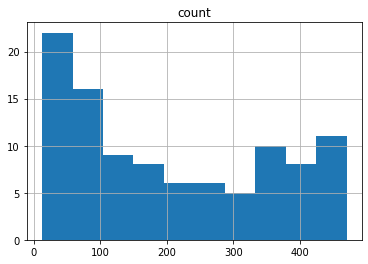

In [ ]:
%matplotlib inline
freq_tab[freq_tab["count"] >0].hist()

In [ ]:
data.Designation = data.Designation.astype("category")
#Resource_Allocation=data["Resource Allocation"]
data.Resource_Allocation = data["Resource Allocation"].astype("category")

<ipython-input-10-cc6352fc9e53>:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.Resource_Allocation = data["Resource Allocation"].astype("category")


In [ ]:
data.Designation

/usr/local/lib/python3.9/dist-packages/IPython/lib/pretty.py:697: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  output = repr(obj)


0        2.0
1        1.0
2        2.0
3        1.0
4        3.0
        ... 
12245    1.0
12246    2.0
12247    4.0
12248    3.0
12249    2.0
Name: Designation, Length: 35000, dtype: category
Categories (6, float64): [0.0, 1.0, 2.0, 3.0, 4.0, 5.0]

In [ ]:
data.Resource_Allocation

/usr/local/lib/python3.9/dist-packages/IPython/lib/pretty.py:697: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  output = repr(obj)


0        3.0
1        2.0
2        NaN
3        1.0
4        7.0
        ... 
12245    2.0
12246    4.0
12247    7.0
12248    6.0
12249    2.0
Name: Resource Allocation, Length: 35000, dtype: category
Categories (10, float64): [1.0, 2.0, 3.0, 4.0, ..., 7.0, 8.0, 9.0, 10.0]

In [ ]:
data.corr()

,Burn Rate,Mental Fatigue Score,Resource Allocation
Burn Rate,1.000000,0.944546,0.856278
Mental Fatigue Score,0.944546,1.000000,0.798950
Resource Allocation,0.856278,0.798950,1.000000


In [ ]:
data

,Burn Rate,Company Type,Date of Joining,Designation,Employee ID,Gender,Mental Fatigue Score,Resource Allocation,WFH Setup Available,data
0,0.16,Service,2008-09-30,2.0,fffe32003000360033003200,Female,3.8,3.0,No,train
1,0.36,Service,2008-11-30,1.0,fffe3700360033003500,Male,5.0,2.0,Yes,train
2,0.49,Product,2008-03-10,2.0,fffe31003300320037003900,Female,5.8,NaN,Yes,train
3,0.20,Service,2008-11-03,1.0,fffe32003400380032003900,Male,2.6,1.0,Yes,train
4,0.52,Service,2008-07-24,3.0,fffe31003900340031003600,Female,6.9,7.0,No,train
...,...,...,...,...,...,...,...,...,...,...
12245,NaN,Service,2008-10-02,1.0,fffe3900310034003700,Female,6.1,2.0,Yes,test
12246,NaN,Product,2008-03-31,2.0,fffe32003600330034003000,Female,5.9,4.0,Yes,test
12247,NaN,Service,2008-02-12,4.0,fffe31003800340039003000,Male,9.6,7.0,No,test
12248,NaN,Service,2008-02-06,3.0,fffe32003600380031003800,Male,6.7,6.0,No,test


In [ ]:
train=data[data['data']=='train']
del train['data']
train.columns

Index(['Burn Rate', 'Company Type', 'Date of Joining', 'Designation',
       'Employee ID', 'Gender', 'Mental Fatigue Score', 'Resource Allocation',
       'WFH Setup Available'],
      dtype='object')

In [ ]:
test=data[data['data']=='test']
test.drop(["data", "Burn Rate"],axis=1,inplace=True)
test.columns

<ipython-input-16-ba0595ac415e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(["data", "Burn Rate"],axis=1,inplace=True)


Index(['Company Type', 'Date of Joining', 'Designation', 'Employee ID',
       'Gender', 'Mental Fatigue Score', 'Resource Allocation',
       'WFH Setup Available'],
      dtype='object')

In [ ]:
train.isna().sum()

Burn Rate               1124
Company Type               0
Date of Joining            0
Designation                0
Employee ID                0
Gender                     0
Mental Fatigue Score    2117
Resource Allocation     1381
WFH Setup Available        0
dtype: int64

In [ ]:
train = train.dropna()
train.shape

(18590, 9)

In [ ]:
train.isna().sum()

Burn Rate               0
Company Type            0
Date of Joining         0
Designation             0
Employee ID             0
Gender                  0
Mental Fatigue Score    0
Resource Allocation     0
WFH Setup Available     0
dtype: int64

In [ ]:
train

,Burn Rate,Company Type,Date of Joining,Designation,Employee ID,Gender,Mental Fatigue Score,Resource Allocation,WFH Setup Available
0,0.16,Service,2008-09-30,2.0,fffe32003000360033003200,Female,3.8,3.0,No
1,0.36,Service,2008-11-30,1.0,fffe3700360033003500,Male,5.0,2.0,Yes
3,0.20,Service,2008-11-03,1.0,fffe32003400380032003900,Male,2.6,1.0,Yes
4,0.52,Service,2008-07-24,3.0,fffe31003900340031003600,Female,6.9,7.0,No
5,0.29,Product,2008-11-26,2.0,fffe3300350037003500,Male,3.6,4.0,Yes
...,...,...,...,...,...,...,...,...,...
22743,0.48,Product,2008-12-15,1.0,fffe3300390030003600,Female,6.0,3.0,Yes
22744,0.54,Product,2008-05-27,3.0,fffe32003500370033003200,Male,6.2,7.0,No
22746,0.59,Product,2008-01-19,3.0,fffe33003000350031003800,Female,6.7,6.0,Yes
22748,0.52,Service,2008-01-10,2.0,fffe33003300320036003900,Female,5.9,5.0,No


In [ ]:
train=data[data['data']=='train']
train.drop(["data", "Company Type","Date of Joining","Employee ID","Gender","WFH Setup Available"],axis=1,inplace=True)
train.columns

<ipython-input-21-e04c434eeb70>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(["data", "Company Type","Date of Joining","Employee ID","Gender","WFH Setup Available"],axis=1,inplace=True)


Index(['Burn Rate', 'Designation', 'Mental Fatigue Score',
       'Resource Allocation'],
      dtype='object')

In [ ]:
train = train.dropna()
train.shape

(18590, 4)

In [ ]:
train

,Burn Rate,Designation,Mental Fatigue Score,Resource Allocation
0,0.16,2.0,3.8,3.0
1,0.36,1.0,5.0,2.0
3,0.20,1.0,2.6,1.0
4,0.52,3.0,6.9,7.0
5,0.29,2.0,3.6,4.0
...,...,...,...,...
22743,0.48,1.0,6.0,3.0
22744,0.54,3.0,6.2,7.0
22746,0.59,3.0,6.7,6.0
22748,0.52,2.0,5.9,5.0


In [ ]:
train.isna().sum()

Burn Rate               0
Designation             0
Mental Fatigue Score    0
Resource Allocation     0
dtype: int64

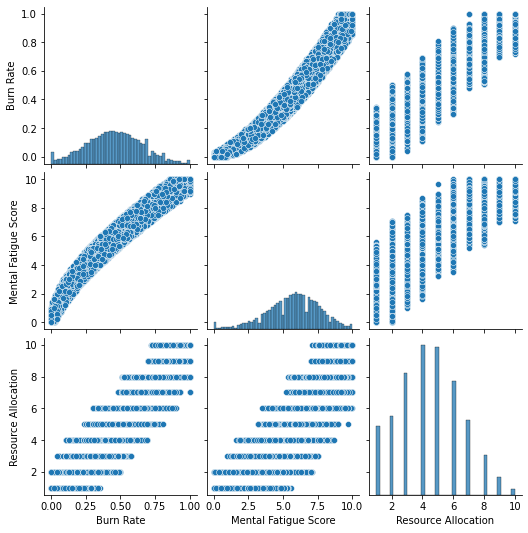

In [ ]:

sns.pairplot(train)

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting data into train and validation sets
train_split, valid = train_test_split(train, train_size = 0.8)
train_y =  train_split["Burn Rate"]
train_x = train_split.loc[:, train_split.columns != 'Burn Rate']
valid_y =  valid["Burn Rate"]
valid_x = valid.loc[:, valid.columns != 'Burn Rate']

In [ ]:
from sklearn.linear_model import LinearRegression

lm=LinearRegression()
lm.fit(train_x,train_y)

print("Intercept:", lm.intercept_)

lr_coefficients = list(zip(train.loc[:, train.columns != 'Burn Rate'].columns,lm.coef_))
print("\nNumber of coefficients:",len(lr_coefficients))
print("\nFeature coefficients:",*lr_coefficients, sep='\n')

Intercept: -0.09535495118674875

Number of coefficients: 3

Feature coefficients:
('Designation', -0.005557675724461721)
('Mental Fatigue Score', 0.07458362062337698)
('Resource Allocation', 0.029455237209267376)


In [ ]:
lr_predicted_train=abs(lm.predict(train_x))
lr_predicted_valid=abs(lm.predict(valid_x))

In [ ]:
from sklearn.metrics import mean_absolute_error
import numpy as np


rmse1 = np.sqrt(mean_absolute_error(train_y, lr_predicted_train))
rmse2 = np.sqrt(mean_absolute_error(valid_y, lr_predicted_valid))
print("train_rmse =", rmse1)
print("valid_rmse =", rmse2)

train_rmse = 0.2141659004343936
valid_rmse = 0.21228078983792278


In [ ]:
from sklearn.metrics import mean_squared_log_error


RMSLE = np.sqrt(mean_squared_log_error(train_y,lr_predicted_train))
score1 = max(0,100 - RMSLE)
print("train_score =", score1)
RMSLE = np.sqrt(mean_squared_log_error(valid_y,lr_predicted_valid))
score2 = max(0,100 - RMSLE)
print("valid_score =", score2)

train_score = 99.96137634843015
valid_score = 99.9618198853717


In [ ]:
lr_predicted_valid.size

3718

In [ ]:
test

,Company Type,Date of Joining,Designation,Employee ID,Gender,Mental Fatigue Score,Resource Allocation,WFH Setup Available
0,Service,2008-12-10,2.0,fffe31003300390039003000,Female,7.7,5.0,No
1,Product,2008-08-14,1.0,fffe31003300310037003800,Female,5.2,2.0,Yes
2,Product,2008-11-13,1.0,fffe33003400380035003900,Male,5.9,3.0,Yes
3,Service,2008-02-07,3.0,fffe3100370039003200,Female,4.6,6.0,No
4,Product,2008-07-17,2.0,fffe32003600390036003700,Female,6.4,5.0,No
...,...,...,...,...,...,...,...,...
12245,Service,2008-10-02,1.0,fffe3900310034003700,Female,6.1,2.0,Yes
12246,Product,2008-03-31,2.0,fffe32003600330034003000,Female,5.9,4.0,Yes
12247,Service,2008-02-12,4.0,fffe31003800340039003000,Male,9.6,7.0,No
12248,Service,2008-02-06,3.0,fffe32003600380031003800,Male,6.7,6.0,No


In [ ]:
columns = ["Company Type","Date of Joining","Employee ID","Gender","WFH Setup Available"]
test = test.drop(columns=columns)

In [ ]:
test

,Designation,Mental Fatigue Score,Resource Allocation
0,2.0,7.7,5.0
1,1.0,5.2,2.0
2,1.0,5.9,3.0
3,3.0,4.6,6.0
4,2.0,6.4,5.0
...,...,...,...
12245,1.0,6.1,2.0
12246,2.0,5.9,4.0
12247,4.0,9.6,7.0
12248,3.0,6.7,6.0


In [ ]:
test=test.dropna()

In [ ]:
test.isna().sum()

Designation             0
Mental Fatigue Score    0
Resource Allocation     0
dtype: int64

In [ ]:
result=lm.predict(test)

In [ ]:
result

array([0.61509976, 0.34583267, 0.42749645, ..., 0.80460376, 0.5644137 ,
       0.10160741])

In [ ]:
test2=test

In [ ]:
test

,Designation,Mental Fatigue Score,Resource Allocation
0,2.0,7.7,5.0
1,1.0,5.2,2.0
2,1.0,5.9,3.0
3,3.0,4.6,6.0
4,2.0,6.4,5.0
...,...,...,...
12245,1.0,6.1,2.0
12246,2.0,5.9,4.0
12247,4.0,9.6,7.0
12248,3.0,6.7,6.0


In [ ]:
test2.insert(3, column = "result", value = result)

In [ ]:
test2

,Designation,Mental Fatigue Score,Resource Allocation,result
0,2.0,7.7,5.0,0.615100
1,1.0,5.2,2.0,0.345833
2,1.0,5.9,3.0,0.427496
3,3.0,4.6,6.0,0.407788
4,2.0,6.4,5.0,0.518141
...,...,...,...,...
12245,1.0,6.1,2.0,0.412958
12246,2.0,5.9,4.0,0.451394
12247,4.0,9.6,7.0,0.804604
12248,3.0,6.7,6.0,0.564414


In [ ]:
test2.to_csv("/content/test_burnrate.csv",index=None)